### 住院时间


In [1]:
import pandas as pd
from copy import deepcopy
from survival_curve import survival_curve
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)

df = deepcopy(adm_pn)
df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['time_diff'] = (df['dischtime'] - df['admittime']).dt.days
print(df.loc[df["mixed_infection"]=="BACT","time_diff"].mean(),df.loc[df["mixed_infection"]=="VIRUS","time_diff"].mean())

11.02492122600974 5.212435233160622


### 发生sepsis


       removed  observed  censored  entrance  at_risk  KM_estimate
0.0       1538      1531         7      2423     2423     0.368139
1.0        136       113        23         0      885     0.321133
2.0        100        70        30         0      749     0.291121
3.0         91        46        45         0      649     0.270487
4.0         77        32        45         0      558     0.254975
5.0         74        23        51         0      481     0.242783
6.0         65        17        48         0      407     0.232642
7.0         51         9        42         0      342     0.226520
8.0         38        11        27         0      291     0.217957
9.0         35         6        29         0      253     0.212788
10.0        27         9        18         0      218     0.204003
11.0        20         5        15         0      191     0.198663
12.0        23         4        19         0      171     0.194016
13.0        23         2        21         0      148     0.19

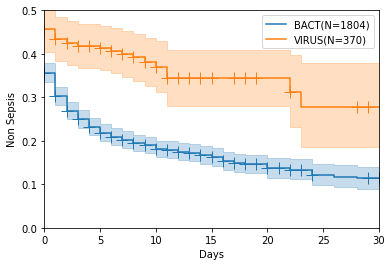

6.109496474953583e-11


In [81]:
import pandas as pd
from copy import deepcopy
from survival_curve import survival_curve
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)
adm_pn = deepcopy(adm_pn.loc[adm_pn["ICU_adm"]==1])

sofa = pd.read_csv("concepts/score/sepsis3.csv")
df = pd.merge(adm_pn, sofa, how="left")

df["sepsis_event"] = 1
df.loc[df["sofa_score"].isna(),"sepsis_event"] = 0
df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['sofa_time'] = pd.to_datetime(df['sofa_time'],format = "%d/%m/%Y %H:%M:%S")

# 计算时间差并提取天数
df['time_diff'] = df.apply(lambda row: (row['sofa_time'] - row['admittime']).days if row['sepsis_event'] == 1 else (row['dischtime'] - row['admittime']).days, axis=1)

# 第一次sepsis时间
survival_d = df.groupby(['hadm_id', 'subject_id', 'mixed_infection','sepsis_event']).min().reset_index()
from survival_curve import survival_curve
survival_curve(survival_d,"time_diff","sepsis_event",'mixed_infection',"BACT","VIRUS","BACT","VIRUS","Days","Non Sepsis",[0,30],[0,0.5])
# survival_d.to_csv("pneumonia/outcome_hospdeath.csv")

### 非肺炎导致的Sepsis的差别

In [6]:
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)
adm_pn = adm_pn.loc[adm_pn["mixed_infection"]=="BACT"]

sofa = pd.read_csv("concepts/spesis/sepsis3.csv")
sofa_npn = sofa.loc[~sofa["stay_id"].isin(adm_pn["stay_id"])]
adm_npn = hosp_icu.loc[hosp_icu["stay_id"].isin(sofa_npn["stay_id"])]
diagnoses_npn = diagnoses.loc[diagnoses["hadm_id"].isin(adm_npn["hadm_id"])]
adm_npn = pd.merge(diagnoses_npn, adm_npn)
adm_npn.to_csv("pneumonia/adm_npn.csv")

adm_pn["pn"] = 1
adm_npn["pn"] = 0
sofa = pd.read_csv("concepts/score/sepsis3.csv")
df = pd.concat([adm_pn.loc[adm_pn["stay_id"].isin(sofa["stay_id"]),adm_npn.columns], adm_npn])

        removed  observed  censored  entrance  at_risk  KM_estimate
-1.0          4         4         0     28077    28077     0.999858
 0.0        565       442       123         0    28073     0.984115
 1.0        919       491       428         0    27508     0.966549
 2.0       1385       351      1034         0    26589     0.953790
 3.0       1907       304      1603         0    25204     0.942286
...         ...       ...       ...       ...      ...          ...
 145.0        1         0         1         0        5     0.271993
 154.0        1         0         1         0        4     0.271993
 176.0        1         1         0         0        3     0.181329
 184.0        1         0         1         0        2     0.181329
 249.0        1         0         1         0        1     0.181329

[113 rows x 6 columns]


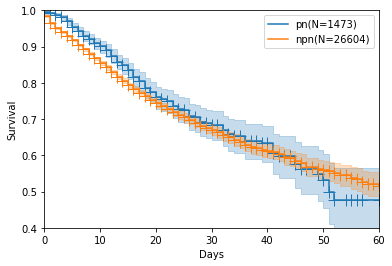

2.586841304922954e-03


In [7]:
df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['deathtime'] = pd.to_datetime(df['deathtime'])
# df['sofa_time'] = pd.to_datetime(df['sofa_time'],format = "%d/%m/%Y %H:%M:%S")

# 计算时间差并提取天数
df['time_diff'] = df.apply(lambda row: (row['deathtime'] - row['admittime']).days if row['death_event'] == 1 else (row['dischtime'] - row['admittime']).days, axis=1)

# 第一次sepsis时间
survival_d = df.groupby(['hadm_id', 'subject_id', 'pn','death_event']).min().reset_index()
from survival_curve import survival_curve
survival_curve(survival_d,"time_diff","death_event",'pn',1,0,"pn","npn","Days","Survival",[0,60],[0.4,1])

### 入住ICU


        removed  observed  censored  entrance  at_risk  KM_estimate
-1.0         20        19         1      5859     5859     0.996757
 0.0       2123      1799       324         0     5839     0.689656
 1.0        645        92       553         0     3716     0.672581
 2.0        617        63       554         0     3071     0.658784
 3.0        494        38       456         0     2454     0.648582
...         ...       ...       ...       ...      ...          ...
 98.0         1         0         1         0        5     0.430654
 114.0        1         0         1         0        4     0.430654
 150.0        1         1         0         0        3     0.287102
 151.0        1         0         1         0        2     0.287102
 159.0        1         1         0         0        1     0.000000

[78 rows x 6 columns]


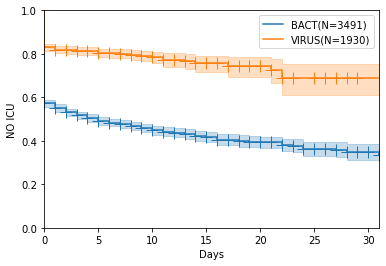

1.2655542770822712e-99


In [14]:
import pandas as pd
from copy import deepcopy
from survival_curve import survival_curve
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)
df = deepcopy(adm_pn)
df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['intime'] = pd.to_datetime(df['intime'])

# 计算时间差并提取天数
df['time_diff'] = df.apply(lambda row: (row['intime'] - row['admittime']).days if row['ICU_adm'] == 1 else (row['dischtime'] - row['admittime']).days, axis=1)

# 入住ICU事件
from survival_curve import survival_curve
survival_curve(df,"time_diff","ICU_adm",'mixed_infection',"BACT","VIRUS","BACT","VIRUS","Days","NO ICU",[0,31],[0,1])

### 住院患者病死


        removed  observed  censored  entrance  at_risk  KM_estimate
-1.0          1         0         1      3685     3685     1.000000
 0.0        324         3       321         0     3684     0.999186
 1.0        553         1       552         0     3360     0.998888
 2.0        554         2       552         0     2807     0.998177
 3.0        456         0       456         0     2253     0.998177
...         ...       ...       ...       ...      ...          ...
 90.0         1         0         1         0        5     0.707655
 91.0         1         1         0         0        4     0.530741
 98.0         1         1         0         0        3     0.353827
 114.0        1         0         1         0        2     0.353827
 151.0        1         0         1         0        1     0.353827

[76 rows x 6 columns]


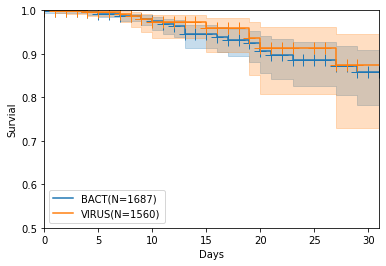

2.609645438670544e-01


In [2]:
import pandas as pd
from copy import deepcopy
from survival_curve import survival_curve
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)

df = deepcopy(adm_pn)

df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['deathtime'] = pd.to_datetime(df['deathtime'])

# 计算时间差并提取天数
df['time_diff'] = df.apply(lambda row: (row['deathtime'] - row['admittime']).days if row['death_event'] == 1 else (row['dischtime'] - row['admittime']).days, axis=1)

# 住院死亡事件
from survival_curve import survival_curve
survival_curve(df,"time_diff","death_event",'mixed_infection',"BACT","VIRUS","BACT","VIRUS","Days","Survial",[0,31],[0.5,1])

### 住院患者31天病死率

        removed  observed  censored  entrance  at_risk  KM_estimate
-1.0          1         0         1      3685     3685     1.000000
 0.0        325         4       321         0     3684     0.998914
 1.0        552         0       552         0     3359     0.998914
 2.0        554         2       552         0     2807     0.998202
 3.0        456         0       456         0     2253     0.998202
...         ...       ...       ...       ...      ...          ...
 85.0         2         0         2         0        7     0.715235
 90.0         2         1         1         0        5     0.572188
 98.0         1         1         0         0        3     0.381459
 114.0        1         0         1         0        2     0.381459
 151.0        1         0         1         0        1     0.381459

[74 rows x 6 columns]


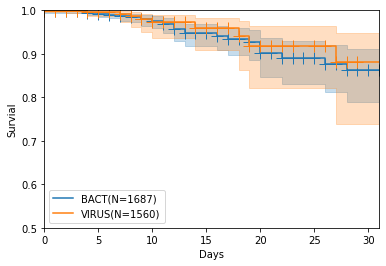

2.3487036075179119e-01


In [3]:
import pandas as pd
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)
adm_pn = adm_pn.loc[adm_pn["ICU_adm"]==0]

patients = pd.read_csv("../MIMIC-IV/mimic-iv-2/hosp/patients.csv")
patients['dod'] = pd.to_datetime(patients['dod']).dt.strftime('%Y-%m-%d') + " 00:00:00"
# 使用merge函数将两个数据框按照subject_id列进行合并
merged_df = pd.merge(adm_pn, patients[['subject_id', 'dod']], on='subject_id', how='left')
# 将第二个数据框中的DOD列的值替换第一个数据框中的deathtime列的值
merged_df['deathtime'] = merged_df['deathtime'].combine_first(merged_df['dod'])

# 删除多余的列（dod列）
merged_df = merged_df.drop('dod', axis=1)

df = deepcopy(merged_df)
df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['deathtime'] = pd.to_datetime(df['deathtime'])

# 计算时间差并提取天数
df['time_diff'] = df.apply(lambda row: (row['deathtime'] - row['admittime']).days if row['death_event'] == 1 else (row['dischtime'] - row['admittime']).days, axis=1)

# 住院死亡事件
from survival_curve import survival_curve
survival_curve(df,"time_diff","death_event",'mixed_infection',"BACT","VIRUS","BACT","VIRUS","Days","Survial",[0,31],[0.5,1])